In [1]:
import numpy as np
import sympy as sp
import models
from pythtb import *
import matplotlib.pyplot as plt

In [2]:
delta_val = 4
t0_val = 1
tp_val = 6
a_val = 1

model = models.chessboard(t0_val, tp_val, delta_val)
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

In [3]:
# generate k-point path and labels
nk = 51
# path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
path = [[0.0, 0.0], [0.0, 0.5]]
(k_vec, k_dist, k_node) = model.k_path(path, nk, report=False)

In [4]:
k_vec.shape

(51, 2)

In [5]:
a = sp.Symbol('a')
kx = sp.Symbol('k_x')
ky = sp.Symbol('k_y')
Delta = sp.Symbol('Delta')
t0 = sp.Symbol('t_0')
tp = sp.Symbol('t_p')

In [6]:
Hk  = sp.Matrix([
[-Delta-2*t0*(sp.cos(a*kx) + sp.cos(a*ky)), tp * ( -1 + sp.exp(-sp.I*a*(kx+ky)) + sp.I * (sp.exp(-sp.I*a*kx) - sp.exp(-sp.I*a*ky)) )],
[tp * ( -1 + sp.exp(sp.I*a*(kx+ky)) - sp.I * (sp.exp(sp.I*a*kx) - sp.exp(sp.I*a*ky)) ), Delta+2*t0*(sp.cos(a*kx) + sp.cos(a*ky))]
])

In [7]:
Hk#.subs({Delta: 2})

Matrix([
[                         -Delta - 2*t_0*(cos(a*k_x) + cos(a*k_y)), t_p*(I*(-exp(-I*a*k_y) + exp(-I*a*k_x)) - 1 + exp(-I*a*(k_x + k_y)))],
[t_p*(-I*(exp(I*a*k_x) - exp(I*a*k_y)) + exp(I*a*(k_x + k_y)) - 1),                              Delta + 2*t_0*(cos(a*k_x) + cos(a*k_y))]])

In [8]:
Hk.subs({kx: np.pi/(2*a), ky: np.pi/(2*a)})


Matrix([
[ -Delta - 2.44929359829471e-16*t_0, t_p*(-1 + exp(-3.14159265358979*I))],
[t_p*(-1 + exp(3.14159265358979*I)),    Delta + 2.44929359829471e-16*t_0]])

In [9]:
evals = list(Hk.eigenvals().keys())

In [10]:
evals[0].simplify()

-sqrt(Delta**2 + 4*Delta*t_0*cos(a*k_x) + 4*Delta*t_0*cos(a*k_y) + 4*t_0**2*cos(a*k_x)**2 + 8*t_0**2*cos(a*k_x)*cos(a*k_y) + 4*t_0**2*cos(a*k_y)**2 - t_p**2*exp(I*a*(k_x - k_y)) - t_p**2*exp(I*a*(k_x + k_y)) + 4*t_p**2 - t_p**2*exp(-I*a*(k_x + k_y)) - t_p**2*exp(-I*a*(k_x - k_y)))

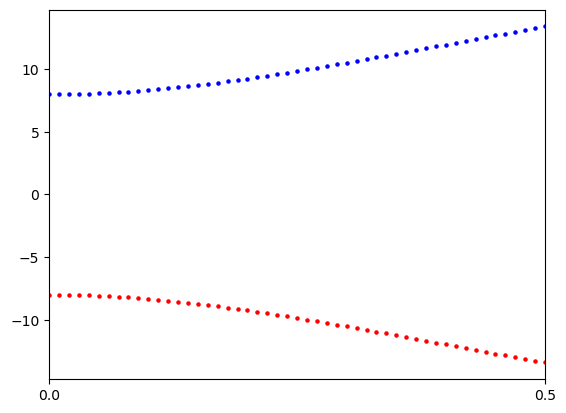

In [11]:
fig, ax = plt.subplots()

ax.set_xlim(0, k_node[-1])
ax.set_xticks(k_node)
# label = (r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
# ax.set_xticklabels(label)
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')

for i in range(k_vec.shape[0]):
    band0 = complex(evals[0].subs(
       {Delta: delta_val, t0: t0_val, tp: tp_val, a: a_val, kx: k_vec[i][0]*np.pi/a_val, ky: k_vec[i][1]*np.pi/a_val}))
    band1 = complex(evals[1].subs(
       {Delta: delta_val, t0: t0_val, tp: tp_val, a: a_val, kx: k_vec[i][0]*np.pi/a_val, ky: k_vec[i][1]*np.pi/a_val}))
    ax.scatter(k_dist[i], band0.real, s=5,  c='r')
    ax.scatter(k_dist[i], band1.real, s=5,  c='b')

In [12]:
evals_pytb, evecs_pytb = model.solve_all(k_vec, eig_vectors=True)

Text(0, 0.5, 'Energy $E(\\mathbf{{k}})$ ')

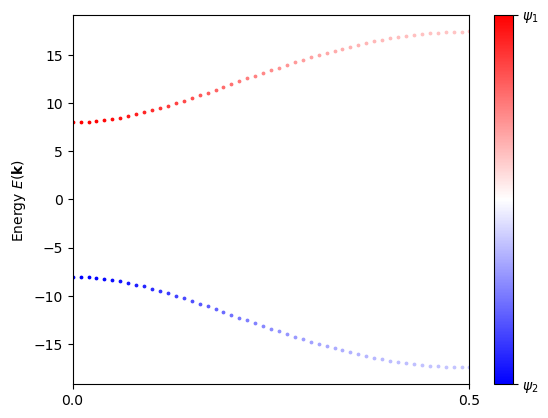

In [13]:
fig, ax = plt.subplots()

ax.set_xlim(0, k_node[-1])
ax.set_xticks(k_node)
# label = (r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
# ax.set_xticklabels(label)
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')

# continuous bands
# for n in range(evals.shape[0]):
#   if n < n_occ:
#       ax.plot(k_dist, evals[n], c='purple')
#   else:
#       ax.plot(k_dist, evals[n], c='orange')

# scattered bands
for k in range(nk):
   for n in range(evals_pytb.shape[0]):
      col = sum( [abs(evecs_pytb[n, k, i])**2 for i in np.arange(1, model.get_num_orbitals(), 2)] )
      scat = ax.scatter(k_dist[k], evals_pytb[n, k], c=col, cmap='bwr', marker='o', s=3, vmin=0, vmax=1)

cbar = fig.colorbar(scat, ticks=[1,0])
cbar.ax.set_yticklabels([r'$\psi_1$', r'$\psi_2$'])
cbar.ax.get_yaxis().labelpad = 20
# ax.set_xlabel("Path in k-space")
ax.set_ylabel(r"Energy $E(\mathbf{{k}})$ ")